## Import Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install xgboost
import xgboost as xgb

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataFinal.csv')

In [4]:
df.shape

(53242, 11)

In [5]:
df.head()

,Unnamed: 0,product_link,image_link,sponsered,title,offer_price,currency,rating,category,mrp,isBestSeller
0,0,https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/61wsCKCU-v...,0,Bluetooth Speakerphone with 4 Mics & Noise Can...,119.00,$,4.6 out of 5 stars,electronics,160.6,True
1,1,https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/715lrpvxXT...,0,Herdio 5.25 Inches 200 Watts Indoor Outdoor Pa...,115.99,$,4.4 out of 5 stars,misc,156.5,False
2,2,https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/71z614nKXa...,0,MIATONE 60W Portable Bluetooth Speaker with Ti...,99.99,$,4.2 out of 5 stars,electronics,129.9,False
3,3,https://www.amazon.com/Edison-Professional-Arm...,https://m.media-amazon.com/images/I/61F6I80gFy...,0,Edison Professional - Portable IPX7 Bluetooth ...,29.99,$,4.8 out of 5 stars,electronics,35.9,False
4,4,https://www.amazon.com/Bluetooth-Yatide-Resist...,https://m.media-amazon.com/images/I/81ZAXCCd6H...,0,"Portable Bluetooth Speakers, Yatide Wireless S...",32.99,$,4.4 out of 5 stars,electronics,39.5,False


## Preprocessing

In [6]:
# New DataFrame with relevant columns
new_df = df.drop(['Unnamed: 0', 'product_link', 'image_link', 'sponsered', 'title', 'currency'], axis=1)

In [7]:
new_df.head()

,offer_price,rating,category,mrp,isBestSeller
0,119.00,4.6 out of 5 stars,electronics,160.6,True
1,115.99,4.4 out of 5 stars,misc,156.5,False
2,99.99,4.2 out of 5 stars,electronics,129.9,False
3,29.99,4.8 out of 5 stars,electronics,35.9,False
4,32.99,4.4 out of 5 stars,electronics,39.5,False


In [8]:
# Missing Value
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53242 entries, 0 to 53241
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   offer_price   53242 non-null  float64
 1   rating        53242 non-null  object 
 2   category      53242 non-null  object 
 3   mrp           53242 non-null  float64
 4   isBestSeller  53242 non-null  bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 1.7+ MB


There are no missing values in the dataset

In [9]:
new_df['rating'] = new_df['rating'].apply(lambda x: x[:3])

In [10]:
new_df['rating'] = new_df['rating'].astype(float)

In [11]:
new_df.head()

,offer_price,rating,category,mrp,isBestSeller
0,119.00,4.6,electronics,160.6,True
1,115.99,4.4,misc,156.5,False
2,99.99,4.2,electronics,129.9,False
3,29.99,4.8,electronics,35.9,False
4,32.99,4.4,electronics,39.5,False


In [12]:
# One hot encoding category variable
ohe = pd.get_dummies(new_df['category'])

In [13]:
ohe.head()

,accessories,clothing,electronics,misc,musical_instrument
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [14]:
new_df.drop(['category'], axis=1, inplace=True)

In [15]:
new_df = new_df.join(ohe)

In [16]:
new_df.head()

,offer_price,rating,mrp,isBestSeller,accessories,clothing,electronics,misc,musical_instrument
0,119.00,4.6,160.6,True,0,0,1,0,0
1,115.99,4.4,156.5,False,0,0,0,1,0
2,99.99,4.2,129.9,False,0,0,1,0,0
3,29.99,4.8,35.9,False,0,0,1,0,0
4,32.99,4.4,39.5,False,0,0,1,0,0


In [17]:
# Label encoding best sellers
le = LabelEncoder()

In [18]:
new_df['isBestSeller'] = le.fit_transform(new_df['isBestSeller'])

In [19]:
new_df.isBestSeller.value_counts()

0    50103
1     3139
Name: isBestSeller, dtype: int64

In [21]:
new_df.to_csv('new_df.csv', index=False)

## Splitting

In [22]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(['isBestSeller'], axis=1), new_df['isBestSeller'], test_size=.2, stratify=new_df['isBestSeller'])

In [23]:
X_train.shape

(42593, 8)

## XGBoost

In [24]:
model = xgb.XGBClassifier()

In [25]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Testing

In [26]:
X_test.head()

,offer_price,rating,mrp,accessories,clothing,electronics,misc,musical_instrument
23334,29.00,4.3,34.8,0,0,0,0,1
33454,29.00,4.3,34.8,0,0,1,0,0
5533,29.00,4.3,34.8,0,0,1,0,0
11670,29.00,4.3,34.8,0,0,0,1,0
18743,34.99,4.0,41.9,0,0,1,0,0


In [27]:
y_pred = model.predict(X_test)

In [28]:
acc = accuracy_score(y_pred, y_test)

In [29]:
acc

1.0

## Category-Sales Analysis

In [30]:
new_df.head()

,offer_price,rating,mrp,isBestSeller,accessories,clothing,electronics,misc,musical_instrument
0,119.00,4.6,160.6,1,0,0,1,0,0
1,115.99,4.4,156.5,0,0,0,0,1,0
2,99.99,4.2,129.9,0,0,0,1,0,0
3,29.99,4.8,35.9,0,0,0,1,0,0
4,32.99,4.4,39.5,0,0,0,1,0,0


In [31]:
# Original DataSet
df.head()

,Unnamed: 0,product_link,image_link,sponsered,title,offer_price,currency,rating,category,mrp,isBestSeller
0,0,https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/61wsCKCU-v...,0,Bluetooth Speakerphone with 4 Mics & Noise Can...,119.00,$,4.6 out of 5 stars,electronics,160.6,True
1,1,https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/715lrpvxXT...,0,Herdio 5.25 Inches 200 Watts Indoor Outdoor Pa...,115.99,$,4.4 out of 5 stars,misc,156.5,False
2,2,https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/71z614nKXa...,0,MIATONE 60W Portable Bluetooth Speaker with Ti...,99.99,$,4.2 out of 5 stars,electronics,129.9,False
3,3,https://www.amazon.com/Edison-Professional-Arm...,https://m.media-amazon.com/images/I/61F6I80gFy...,0,Edison Professional - Portable IPX7 Bluetooth ...,29.99,$,4.8 out of 5 stars,electronics,35.9,False
4,4,https://www.amazon.com/Bluetooth-Yatide-Resist...,https://m.media-amazon.com/images/I/81ZAXCCd6H...,0,"Portable Bluetooth Speakers, Yatide Wireless S...",32.99,$,4.4 out of 5 stars,electronics,39.5,False


In [32]:
new_df['category'] = df['category']

In [33]:
new_df.head()

,offer_price,rating,mrp,isBestSeller,accessories,clothing,electronics,misc,musical_instrument,category
0,119.00,4.6,160.6,1,0,0,1,0,0,electronics
1,115.99,4.4,156.5,0,0,0,0,1,0,misc
2,99.99,4.2,129.9,0,0,0,1,0,0,electronics
3,29.99,4.8,35.9,0,0,0,1,0,0,electronics
4,32.99,4.4,39.5,0,0,0,1,0,0,electronics


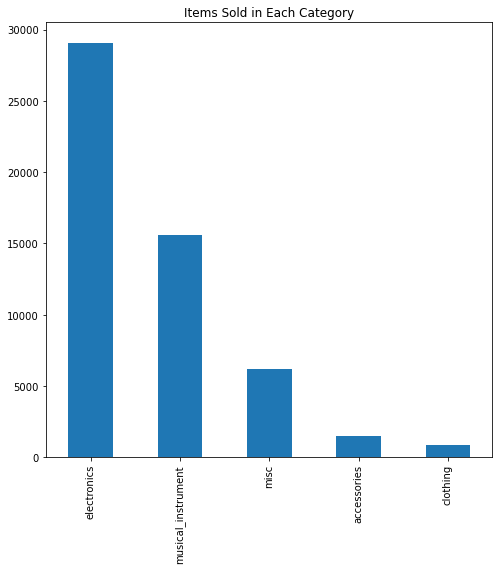

In [34]:
data = new_df["category"].value_counts()
data.plot(x='category',
        kind='bar',
        stacked=False,
        title='Items Sold in Each Category',
        figsize=(8,8))
plt.show()

Electronic items have the most sales followed by musical intruments. Clothing items have the least sales. 

Clothing needs cutomization which is not possible in online shopping. Hence, low sales.  

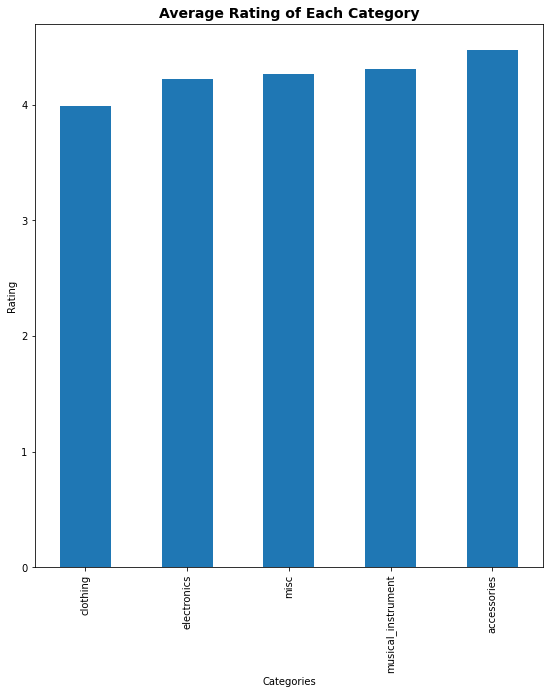

In [35]:
fig = plt.figure(figsize=(8,10))

ax1 = new_df.groupby('category')['rating'].mean().sort_values().plot(kind="bar",)
ax1.set_title("Average Rating of Each Category", fontsize=14, fontweight = 'bold')
ax1.set_xlabel("Categories", fontsize = 10)
ax1.set_ylabel("Rating")

plt.tight_layout(pad=2)
plt.show()

Average ratings for all categories is over 4 out of 5. This shows the quality of goods is good 

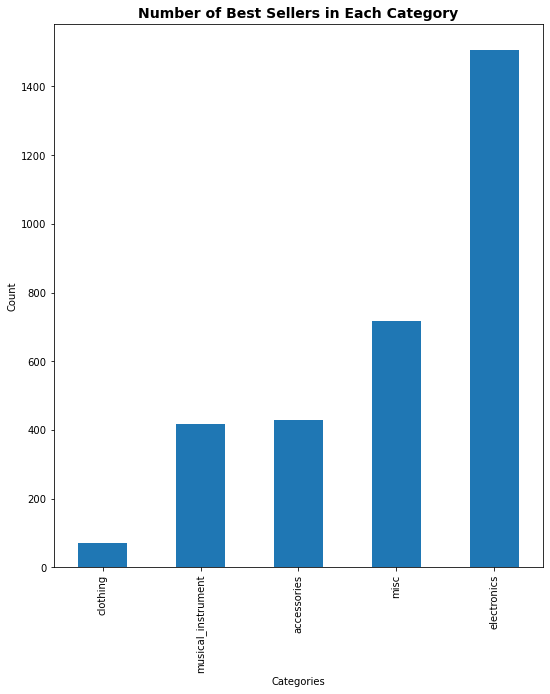

In [36]:
fig = plt.figure(figsize=(8,10))

ax1 = new_df.groupby('category')['isBestSeller'].sum().sort_values().plot(kind="bar",)
ax1.set_title("Number of Best Sellers in Each Category", fontsize=14, fontweight = 'bold')
ax1.set_xlabel("Categories", fontsize = 10)
ax1.set_ylabel("Count")

plt.tight_layout(pad=2)
plt.show()

Number of best sellers and number of items sold follow the same distribution.




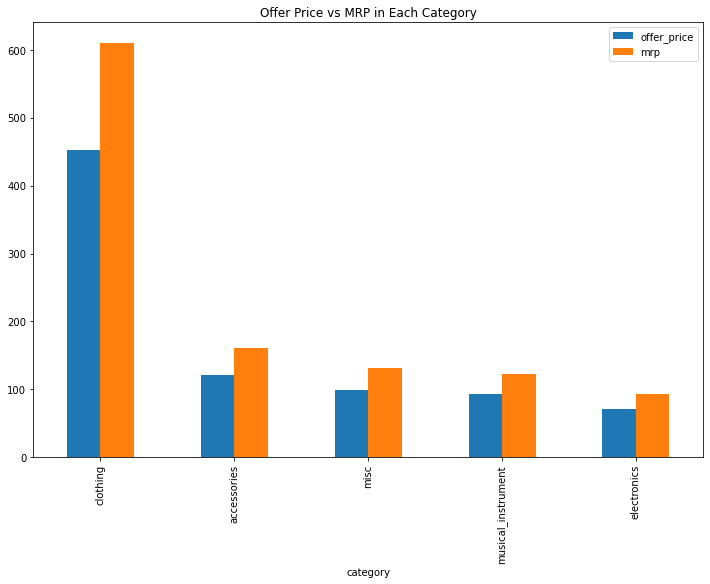

In [37]:
data = new_df.groupby("category")[['offer_price', 'mrp']].mean().reset_index().sort_values(by = 'offer_price', ascending = False)
data.plot(x='category',
        kind='bar',
        stacked=False,
        title='Offer Price vs MRP in Each Category',
        figsize=(12,8))
plt.show()

Maximum discount is on clothing items but they have the least number of sales. Discounts are not affecting the sales. 

## Correlation b/w Price and Amount of Sales

<AxesSubplot:ylabel='Frequency'>

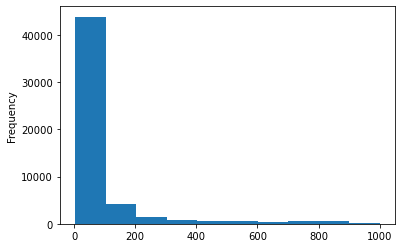

In [38]:
new_df.offer_price.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

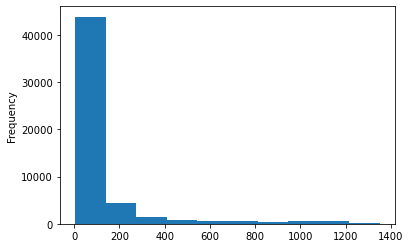

In [39]:
new_df.mrp.plot(kind='hist')

The above histograms shows the affect of price on the sales. Items with the lowest MRP and offer price have maximum sales. 